In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dropout, BatchNormalization, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import joblib
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

pd.pandas.set_option('display.max_columns',None)

In [2]:
train_raw = pd.read_csv("train_raw.csv")
train_raw.head()

/var/folders/gn/clhq9k9140jfd9jjcjjjpqvh0000gn/T/ipykernel_55498/418986892.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train_raw = pd.read_csv("train_raw.csv")


,Accident_Index,1st_Road_Class_x,1st_Road_Number,2nd_Road_Class_x,2nd_Road_Number,Accident_Severity_x,Date,Day_of_Week_x,Did_Police_Officer_Attend_Scene_of_Accident_x,Junction_Control_x,Junction_Detail_x,Latitude,Light_Conditions_x,Local_Authority_(District)_x,Local_Authority_(Highway)_x,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location_x,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control_x,Pedestrian_Crossing-Physical_Facilities_x,Police_Force_x,Road_Surface_Conditions_x,Road_Type_x,Special_Conditions_at_Site_x,Speed_limit,Time,Urban_or_Rural_Area_x,Weather_Conditions_x,Year_x,InScotland_x,Age_Band_of_Driver,Driver_Home_Area_Type,Journey_Purpose_of_Driver,Junction_Location,Sex_of_Driver,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
0,200501BS00002,2,450.0,3,0.0,2,1104883200,6,0,1,0,51.520075,1,182,89,524170.0,181650.0,-0.211708,2906,1,1,0,4,29,1,1,8,30.0,-3,2,2,2005,0,36 - 45,Data missing or out of range,Journey as part of work,Leaving roundabout,Male,No tow/articulation,Did not leave carriageway,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Nearside,2005
1,200501BS00003,3,0.0,6,0.0,2,1104969600,4,0,2,4,51.525301,1,182,89,524520.0,182240.0,-0.206458,2854,1,2,0,0,29,1,4,8,30.0,-3,2,2,2005,0,26 - 35,Urban area,Journey as part of work,Not at or within 20 metres of junction,Male,No tow/articulation,Did not leave carriageway,Going ahead right-hand bend,1,Bus or coach (17 or more pass seats),No,Nearside,2005
2,200501BS00004,0,3220.0,6,0.0,2,1105056000,0,0,2,4,51.482442,5,182,89,526900.0,177530.0,-0.173862,2837,1,1,0,0,29,1,4,8,30.0,-3,2,2,2005,0,46 - 55,Urban area,Other/Not known (2005-10),Not at or within 20 metres of junction,Female,No tow/articulation,Did not leave carriageway,Going ahead other,1,Car,No,Front,2005
3,200501BS00005,5,0.0,6,0.0,2,1105315200,1,0,2,4,51.495752,0,182,89,528060.0,179040.0,-0.156618,2860,1,1,0,0,29,5,4,8,30.0,-3,2,2,2005,0,46 - 55,Data missing or out of range,Other/Not known (2005-10),Not at or within 20 metres of junction,Male,No tow/articulation,Did not leave carriageway,Going ahead other,1,Motorcycle 125cc and under,No,Front,2005
4,200501BS00006,5,0.0,6,0.0,2,1105401600,5,0,2,4,51.515540,5,182,89,524770.0,181160.0,-0.203238,2829,1,2,0,0,29,5,4,4,30.0,-3,2,6,2005,0,46 - 55,Urban area,Other/Not known (2005-10),Not at or within 20 metres of junction,Male,No tow/articulation,Did not leave carriageway,Moving off,1,Car,No,Did not impact,2005


In [3]:
train_raw.columns

Index(['Accident_Index', '1st_Road_Class_x', '1st_Road_Number',
       '2nd_Road_Class_x', '2nd_Road_Number', 'Accident_Severity_x', 'Date',
       'Day_of_Week_x', 'Did_Police_Officer_Attend_Scene_of_Accident_x',
       'Junction_Control_x', 'Junction_Detail_x', 'Latitude',
       'Light_Conditions_x', 'Local_Authority_(District)_x',
       'Local_Authority_(Highway)_x', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'LSOA_of_Accident_Location_x',
       'Number_of_Casualties', 'Number_of_Vehicles',
       'Pedestrian_Crossing-Human_Control_x',
       'Pedestrian_Crossing-Physical_Facilities_x', 'Police_Force_x',
       'Road_Surface_Conditions_x', 'Road_Type_x',
       'Special_Conditions_at_Site_x', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area_x', 'Weather_Conditions_x', 'Year_x',
       'InScotland_x', 'Age_Band_of_Driver', 'Driver_Home_Area_Type',
       'Journey_Purpose_of_Driver', 'Junction_Location', 'Sex_of_Driver',
       'Towing_and_Articulation

In [4]:
# train_raw.drop('Unnamed: 0', inplace= True)

/var/folders/gn/clhq9k9140jfd9jjcjjjpqvh0000gn/T/ipykernel_55498/1811320141.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LSOA_of_Accident_Location_x'] = label_encoder.fit_transform(data['LSOA_of_Accident_Location_x'])


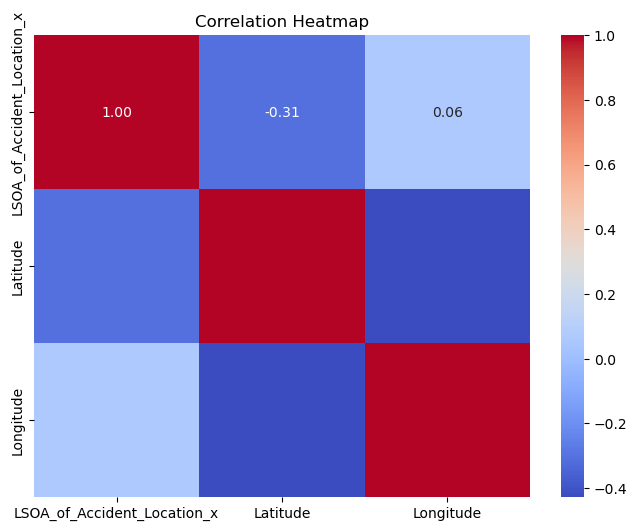

In [5]:
columns_of_interest = ['LSOA_of_Accident_Location_x', 'Latitude', 'Longitude']
data = train_raw[columns_of_interest]

# Encode categorical variable 'LSOA_of_Accident_Location_x'
label_encoder = LabelEncoder()
data['LSOA_of_Accident_Location_x'] = label_encoder.fit_transform(data['LSOA_of_Accident_Location_x'])

# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
# List of categorical columns
categorical_columns = ['Age_Band_of_Driver', 'Driver_Home_Area_Type', 'Journey_Purpose_of_Driver', 
                       'Junction_Location', 'Sex_of_Driver', 
                       'Towing_and_Articulation', 'Vehicle_Leaving_Carriageway', 
                       'Vehicle_Manoeuvre', 'Vehicle_Type', 'Was_Vehicle_Left_Hand_Drive', 'X1st_Point_of_Impact']


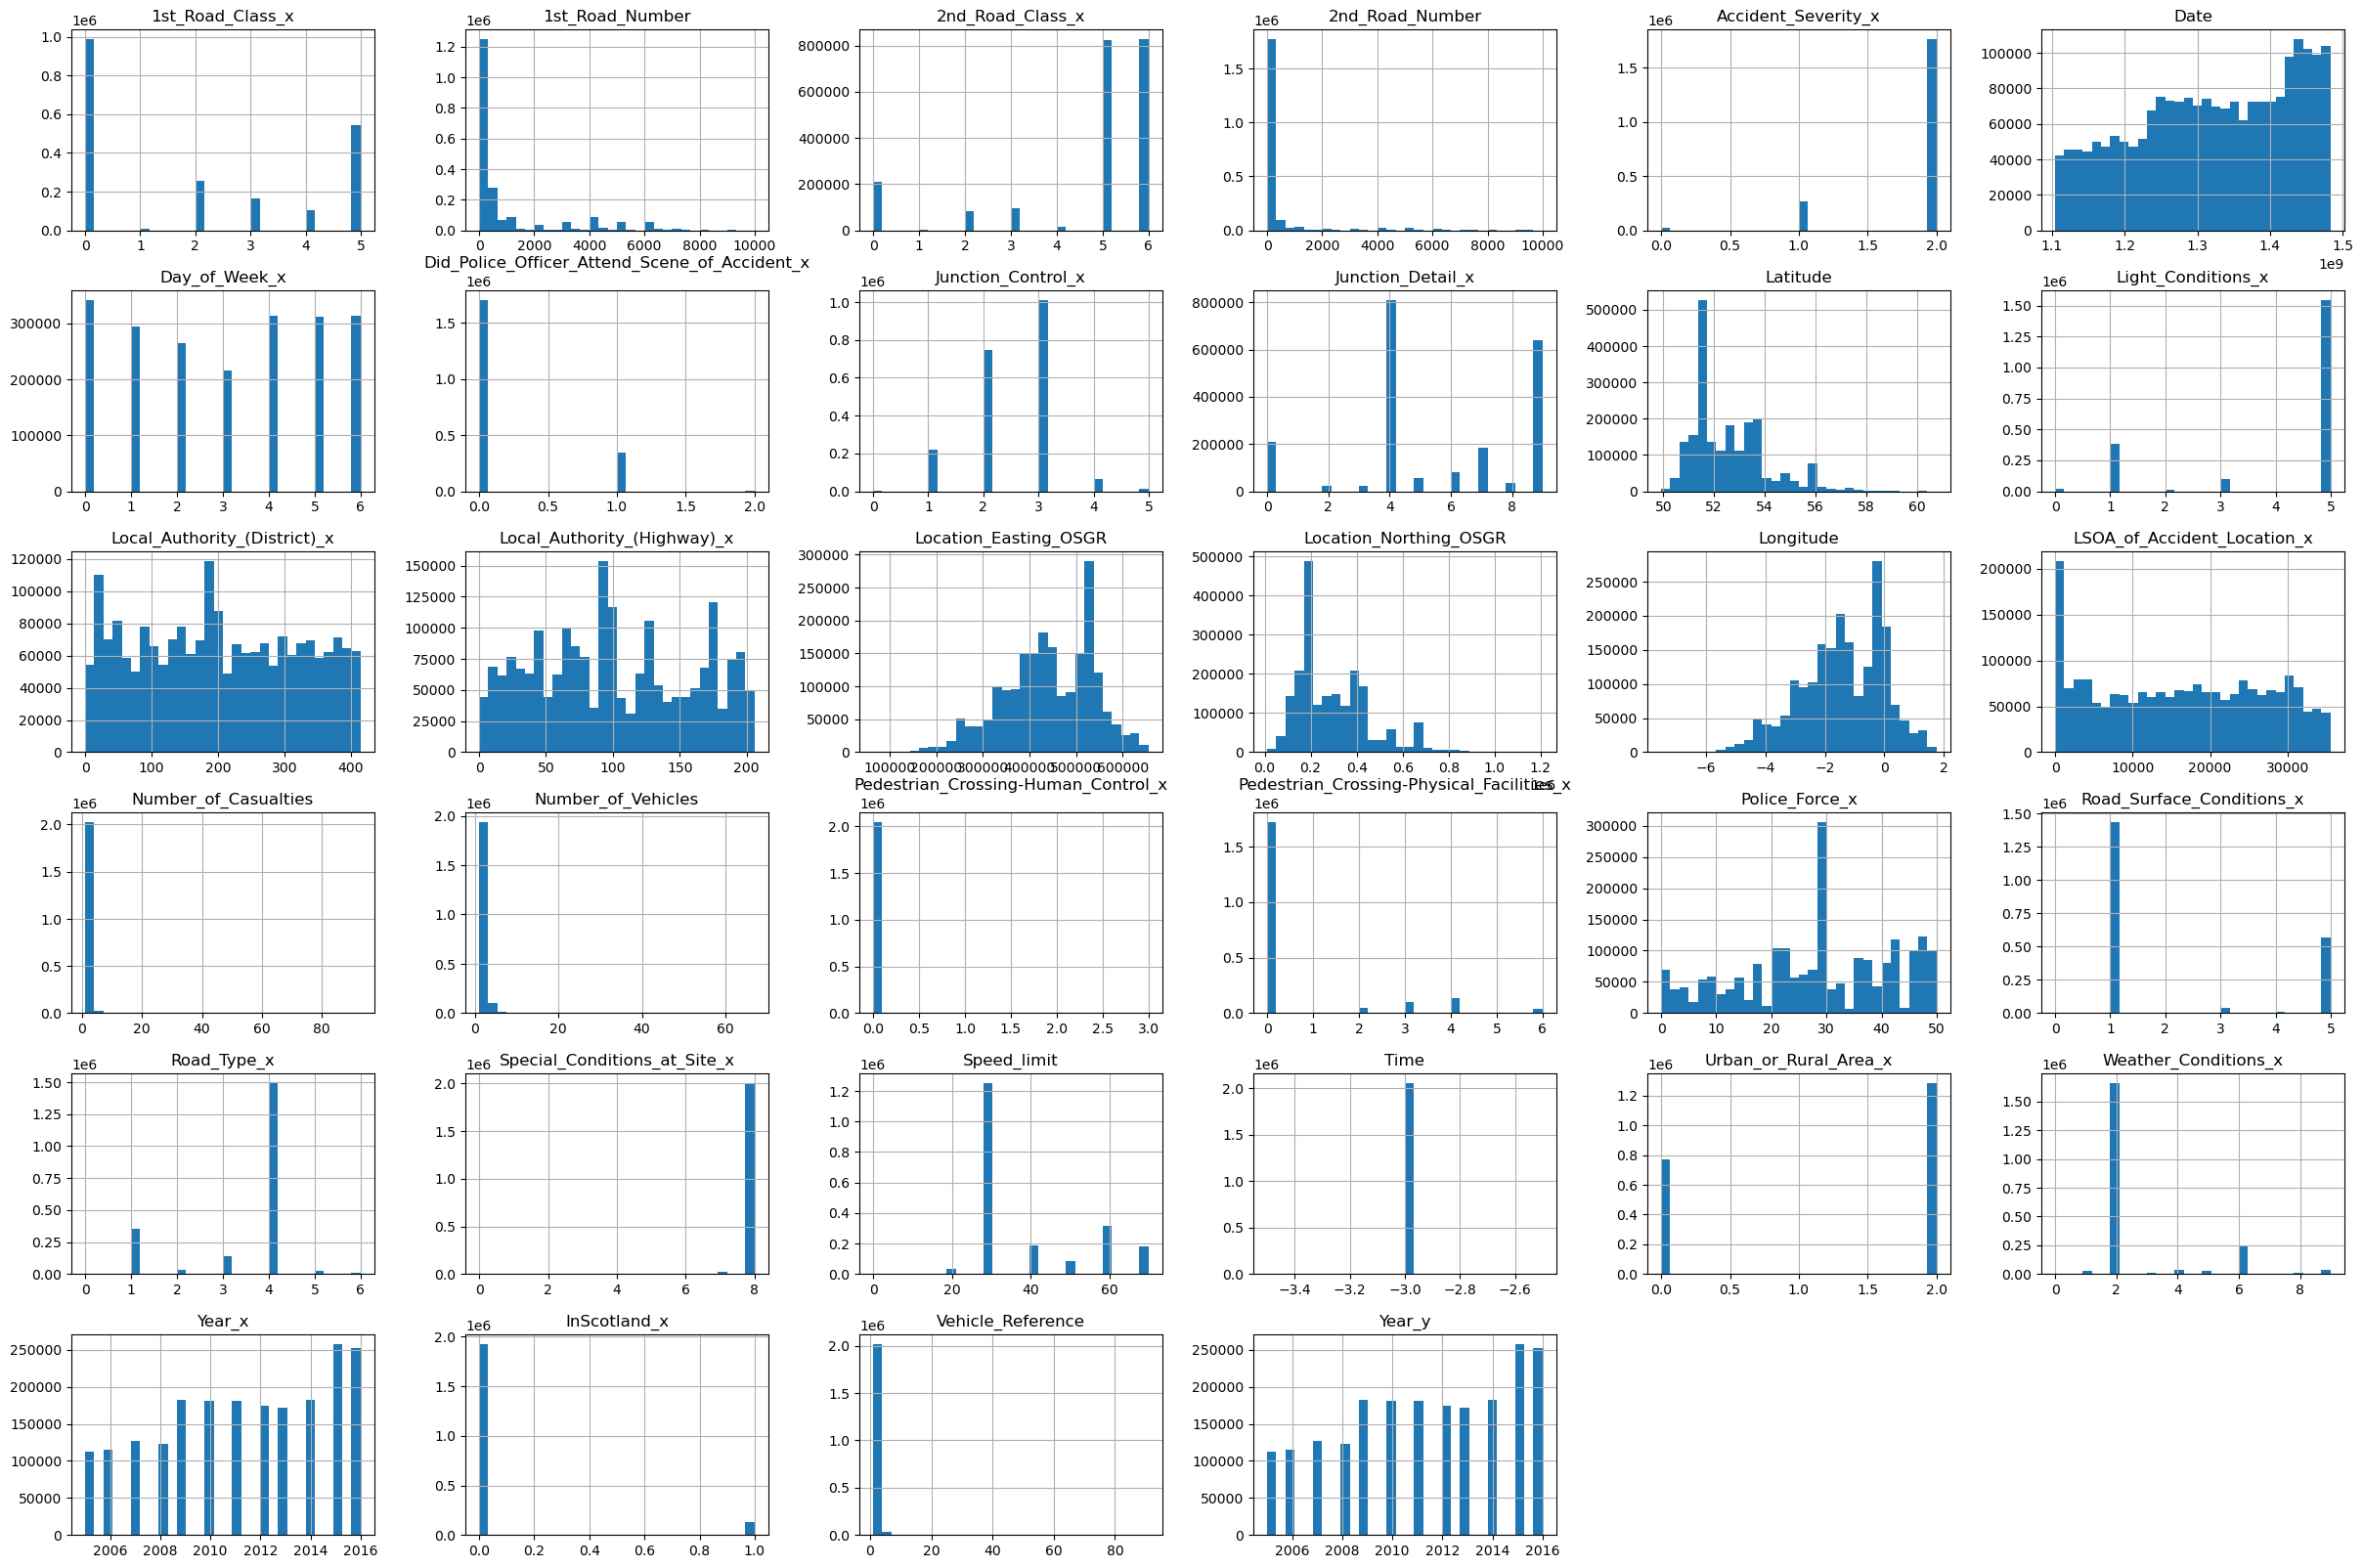

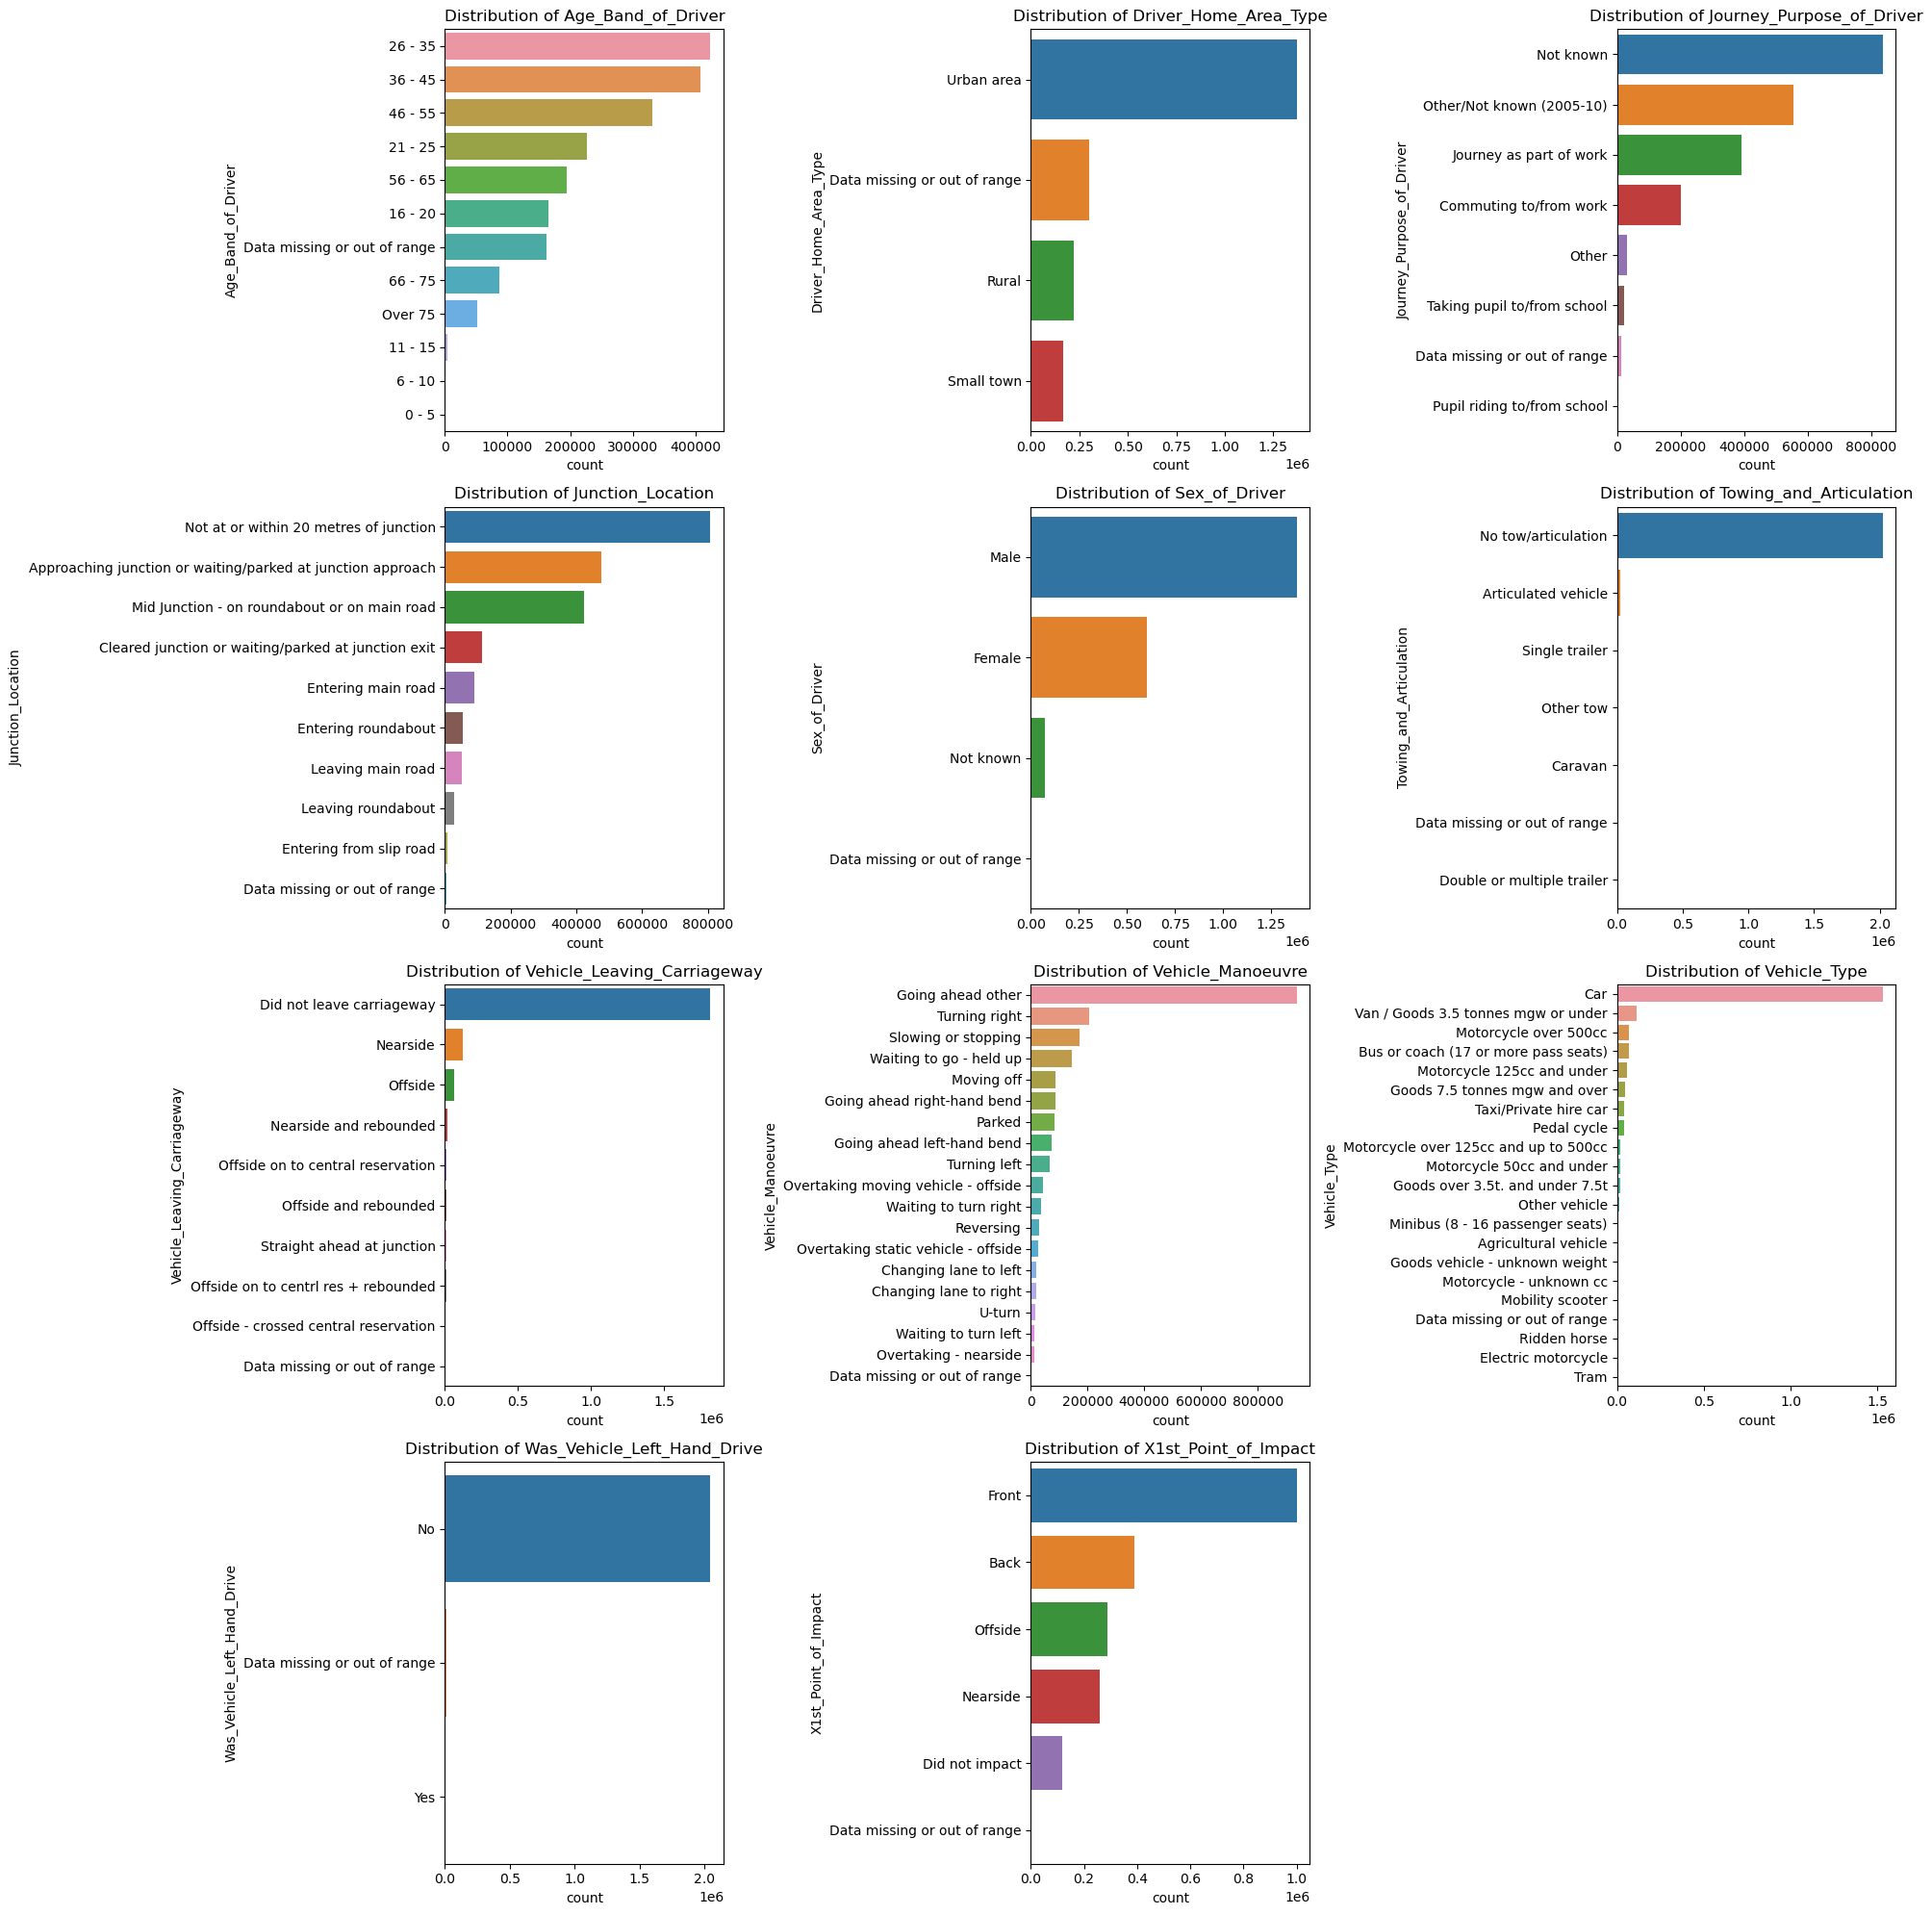

In [7]:
# Plotting histograms for numerical variables
train_raw.hist(bins=30, figsize=(30, 20))
#plt.title('Histograms of Numerical Variables')

# Plotting count plots for categorical variables
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_columns):
    plt.subplot(4, 3, i + 1)
    sns.countplot(y=train_raw[col], order= train_raw[col].value_counts().index)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


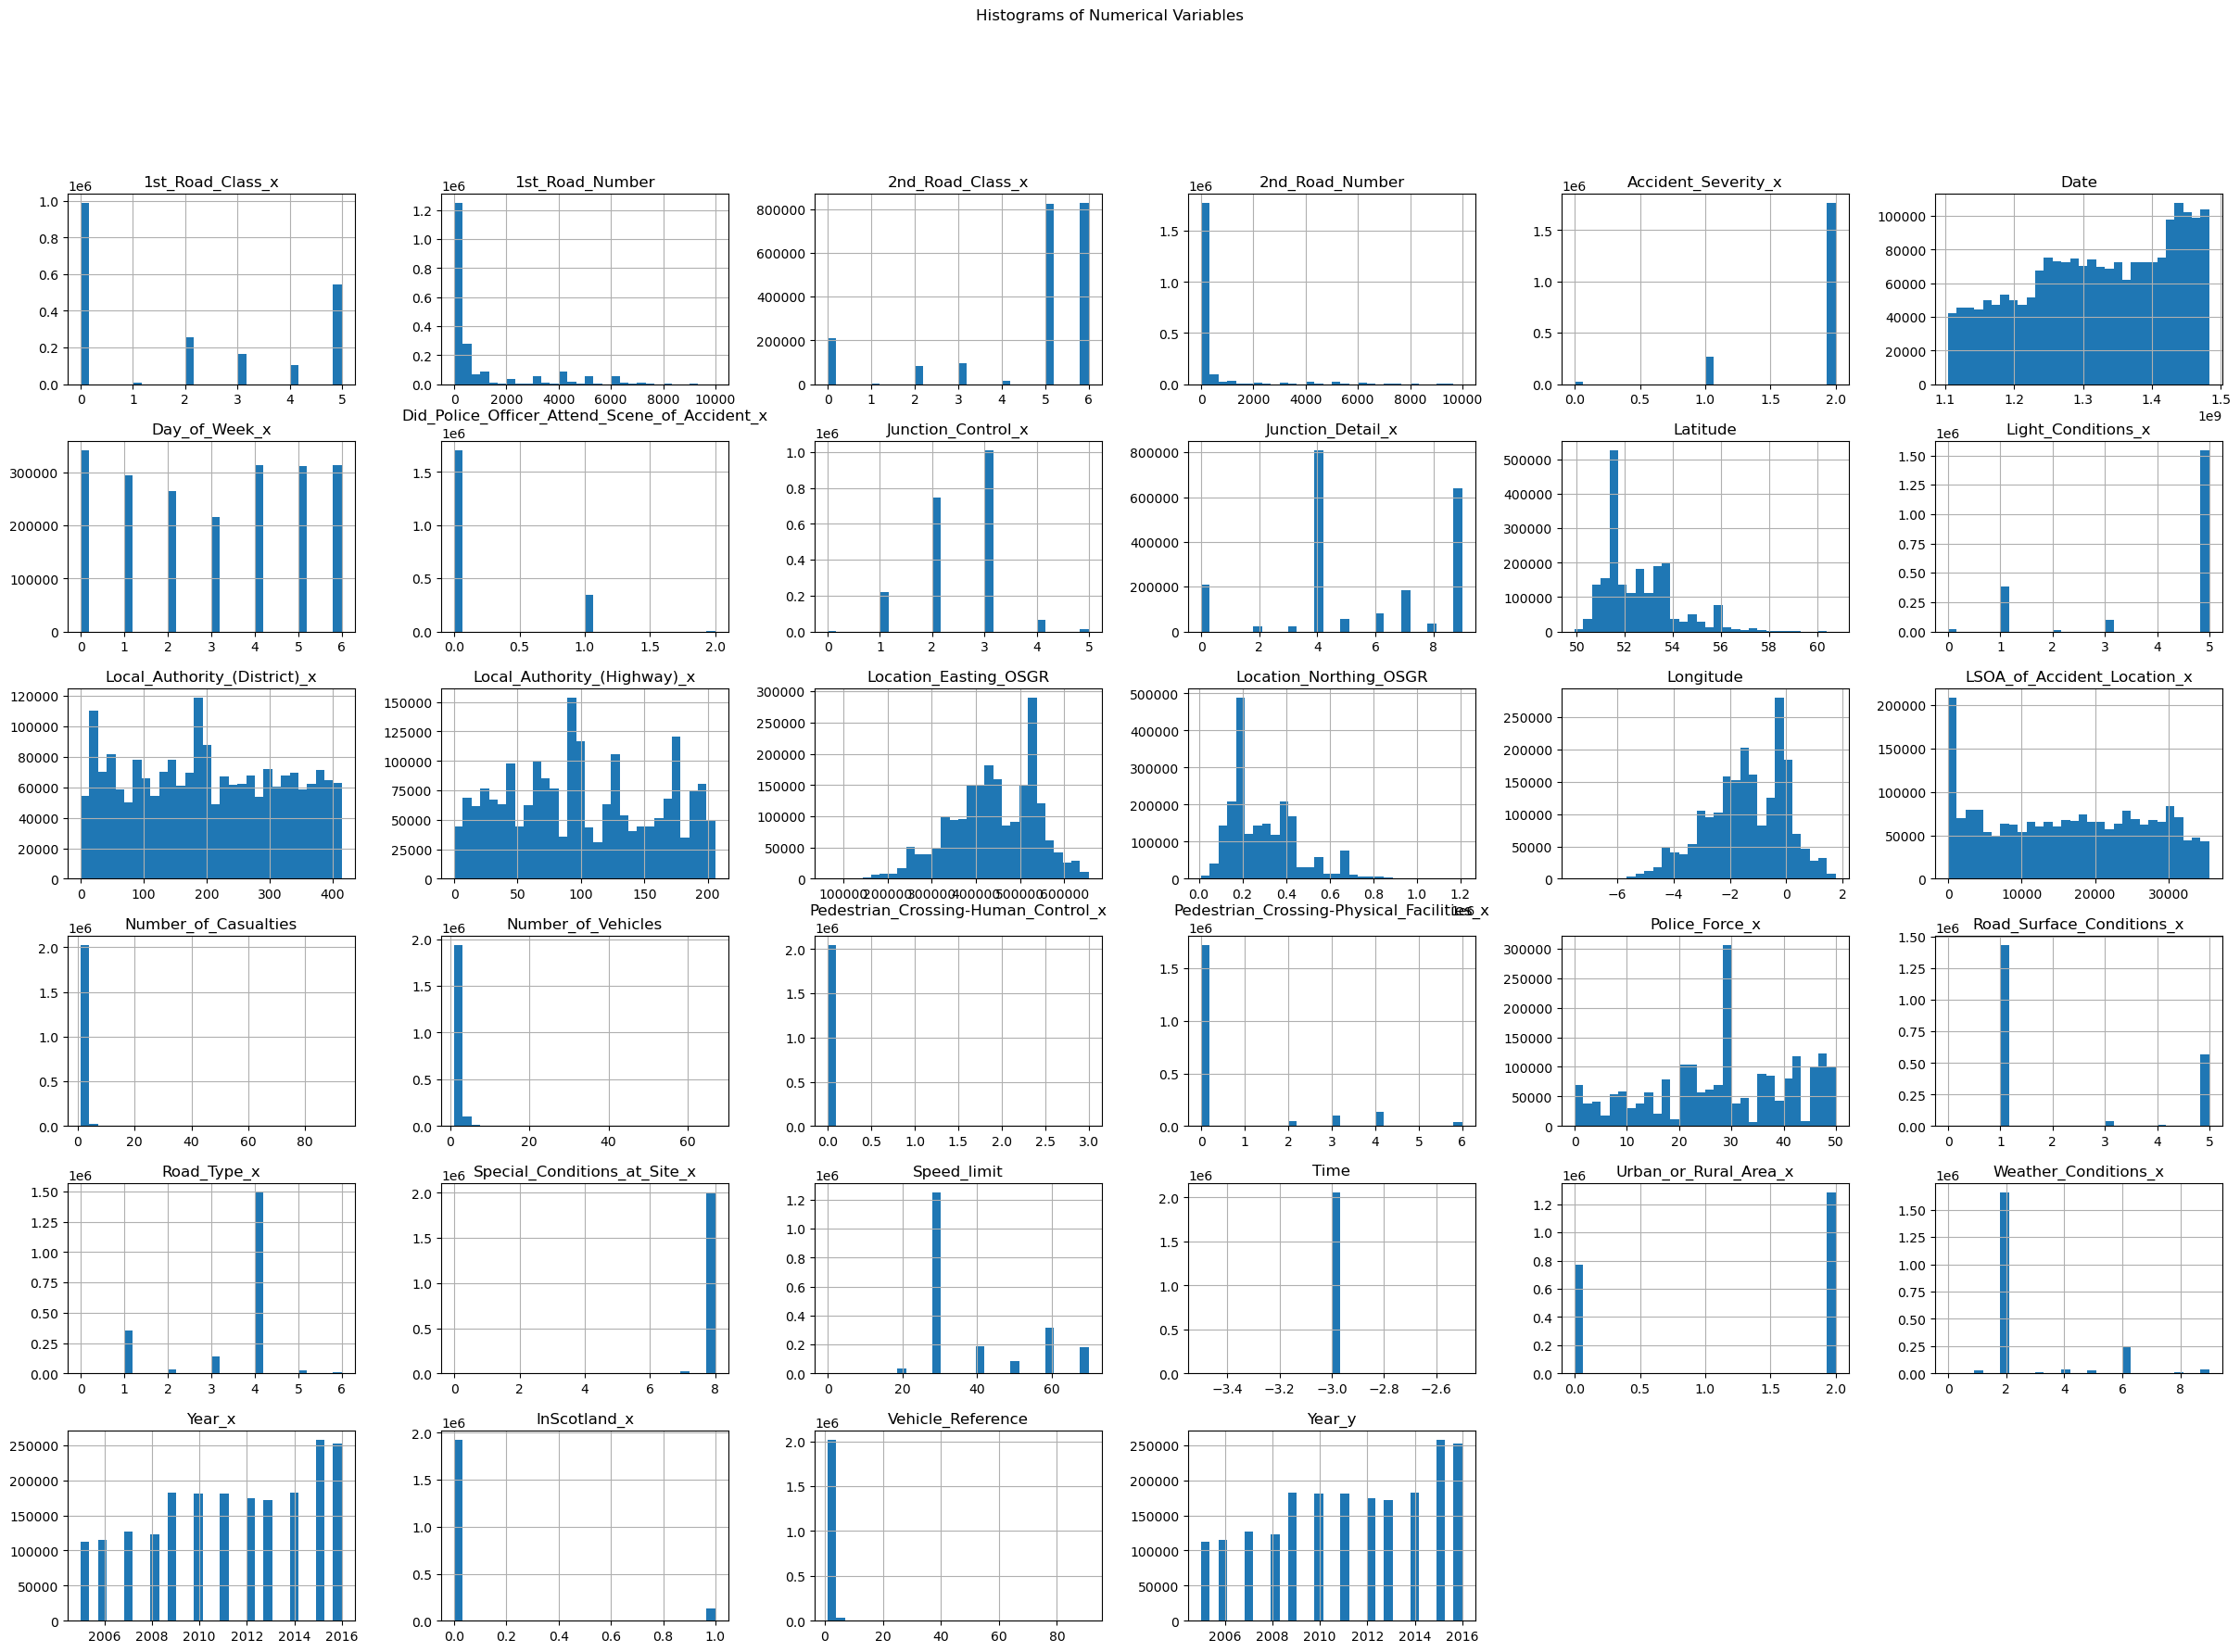

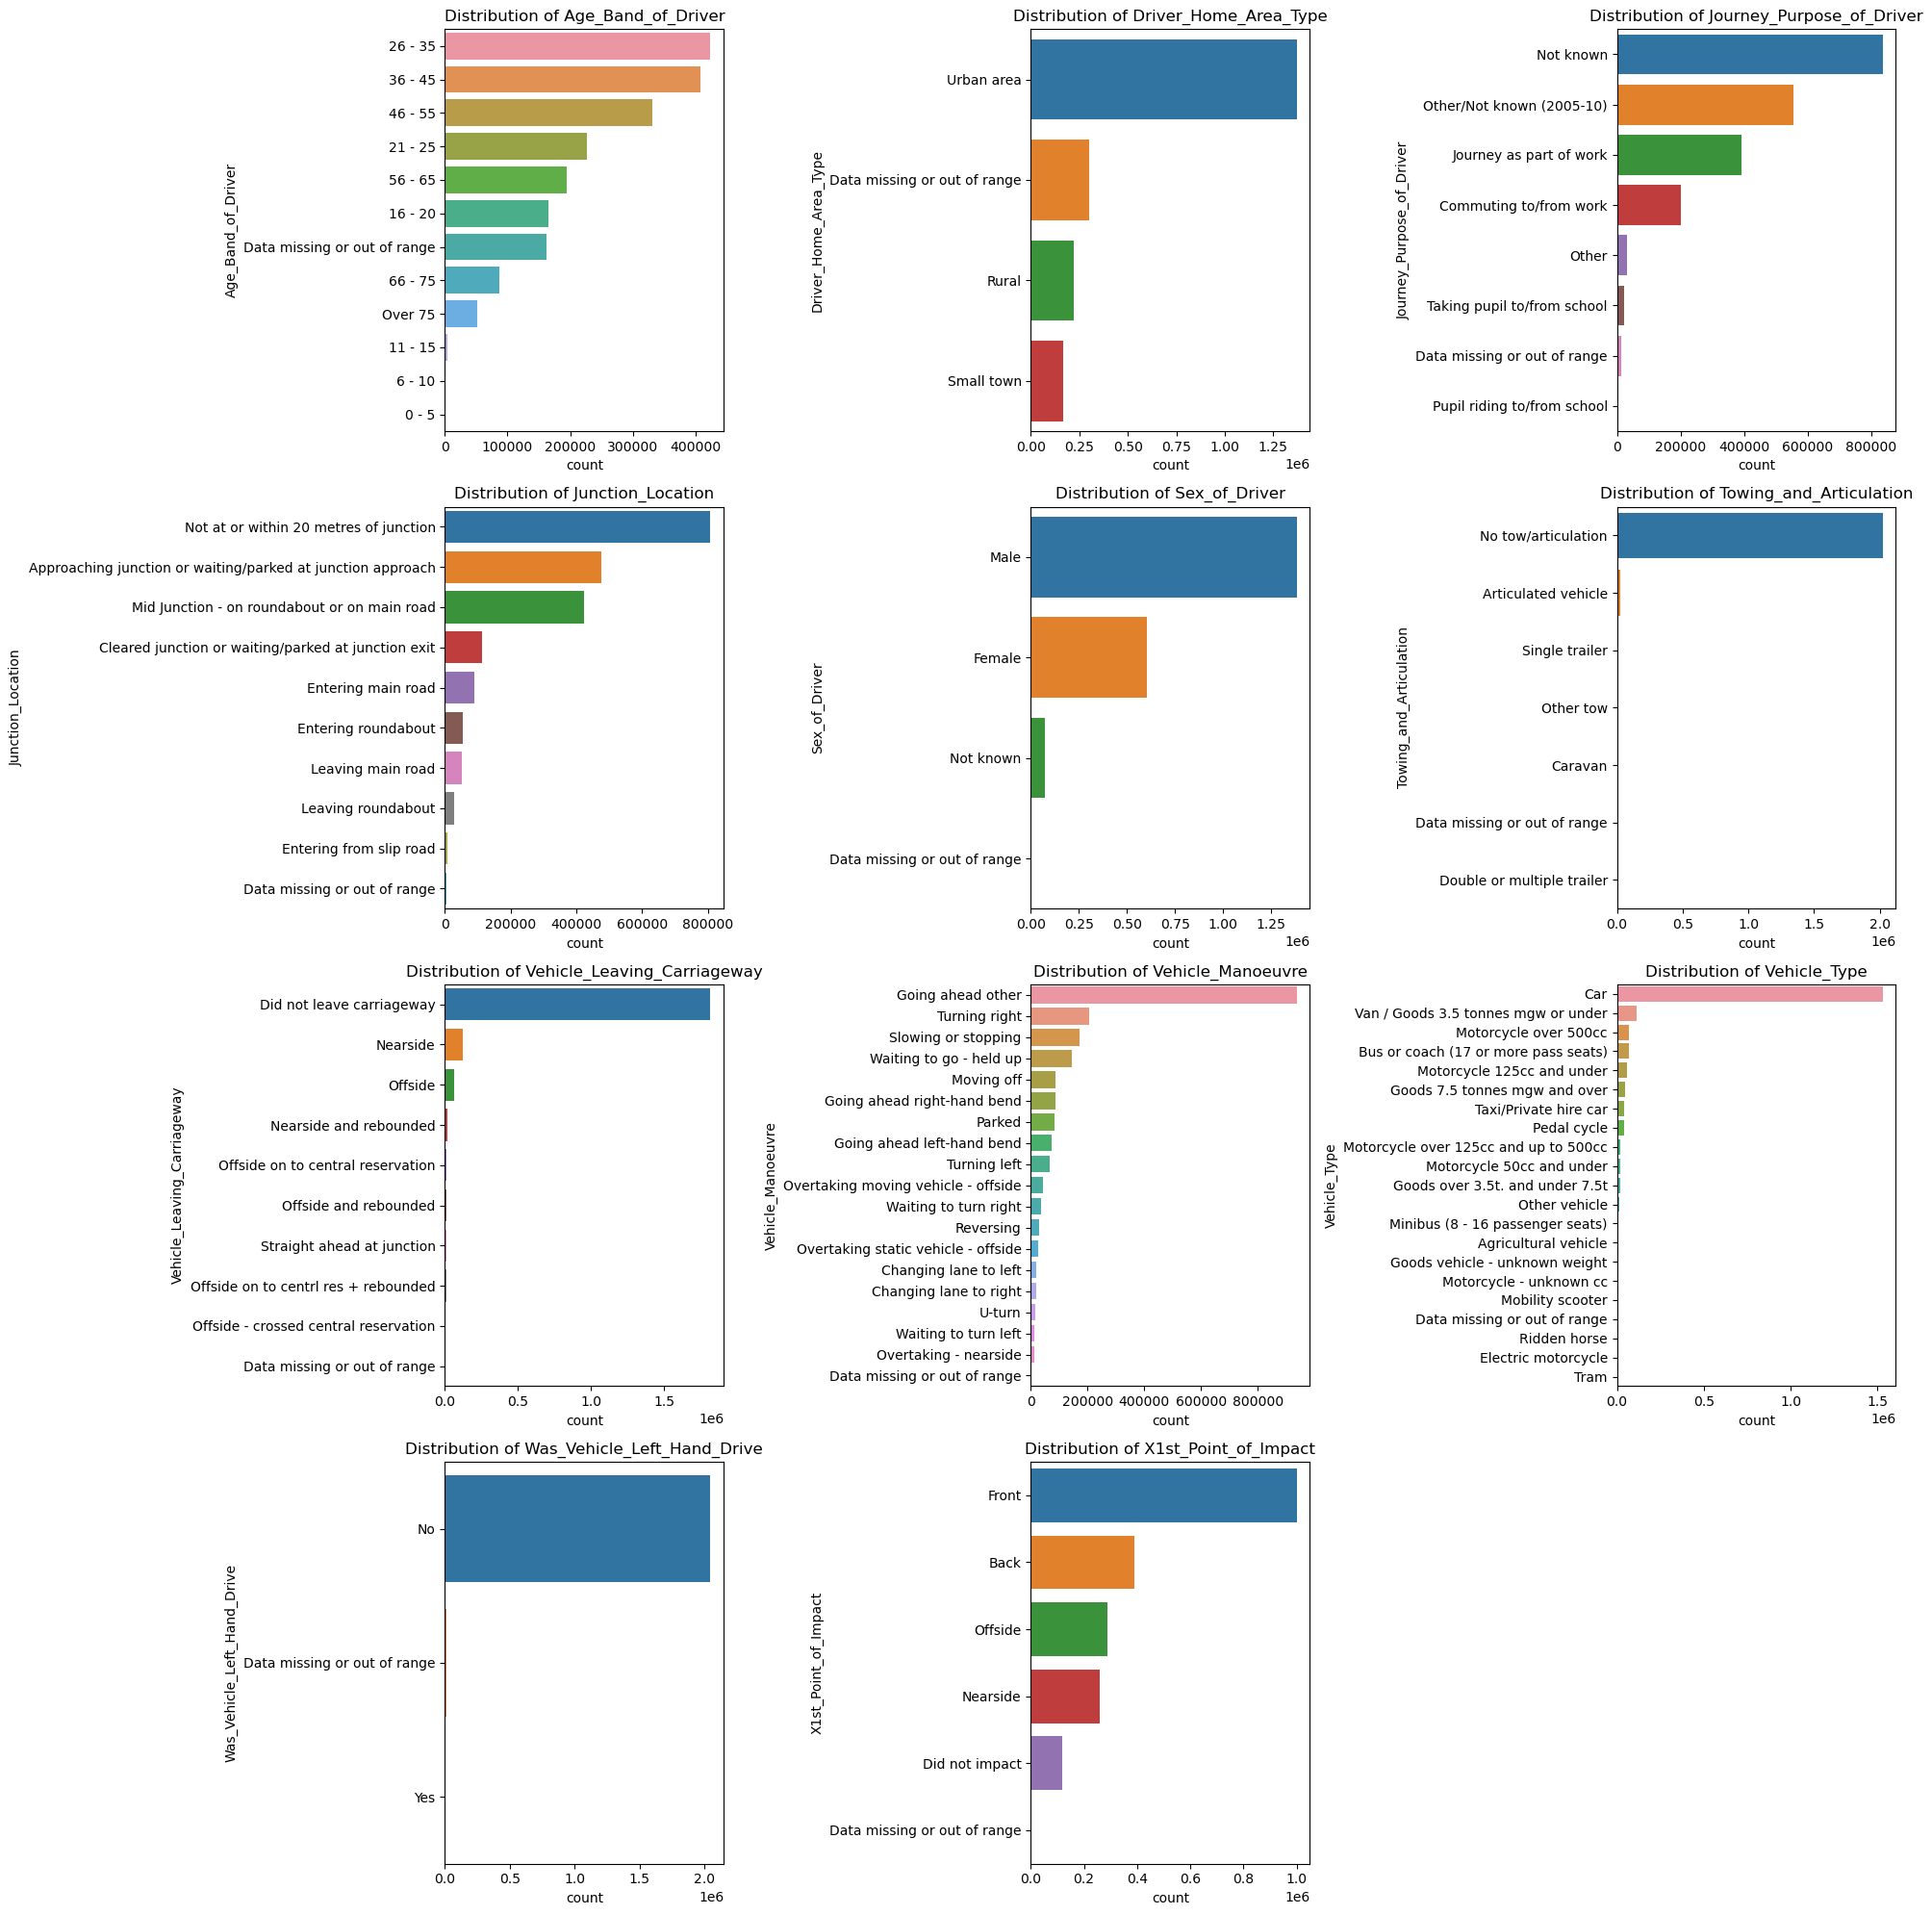

In [8]:
# Plotting histograms for numerical variables
train_raw.hist(bins=30, figsize=(30, 20))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

# Plotting count plots for categorical variables
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_columns):
    plt.subplot(4, 3, i + 1)
    sns.countplot(y=train_raw[col], order=train_raw[col].value_counts().index)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


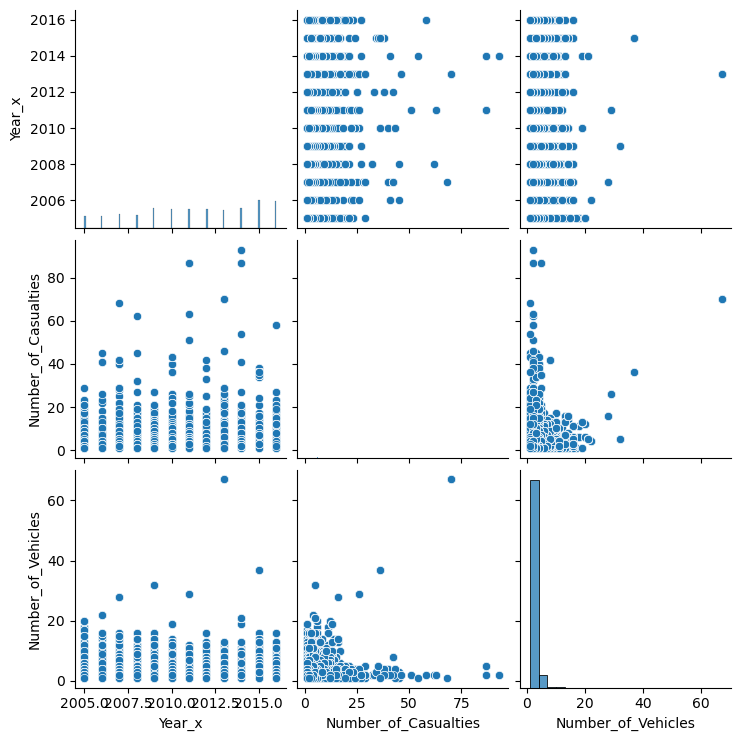

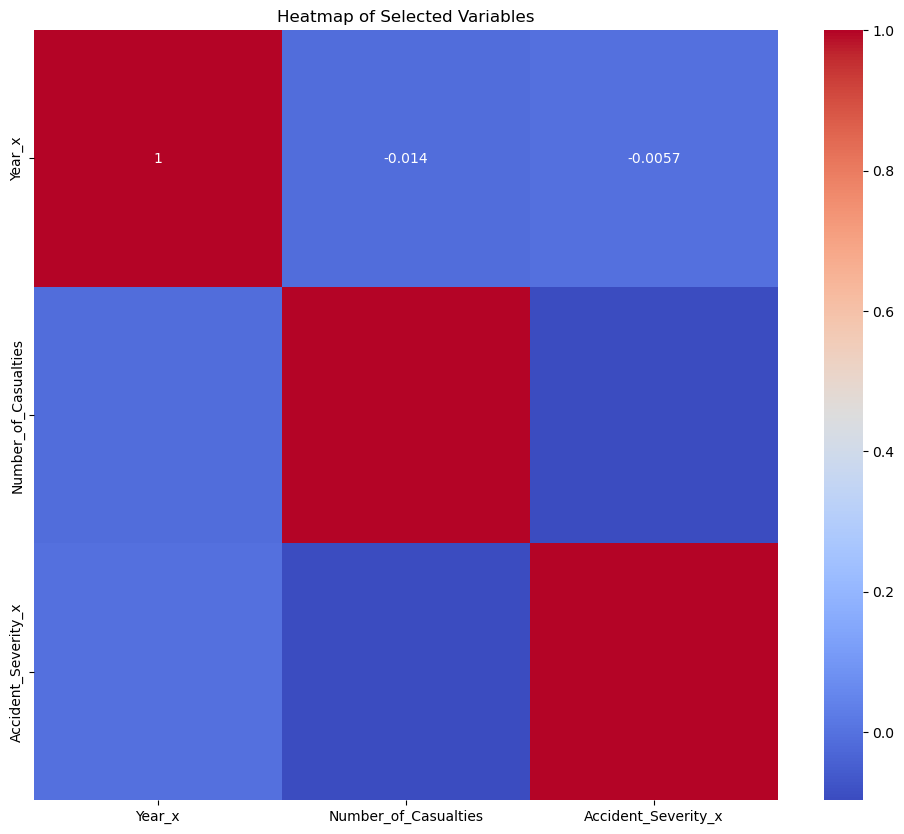

/var/folders/gn/clhq9k9140jfd9jjcjjjpqvh0000gn/T/ipykernel_55498/2598260377.py:21: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


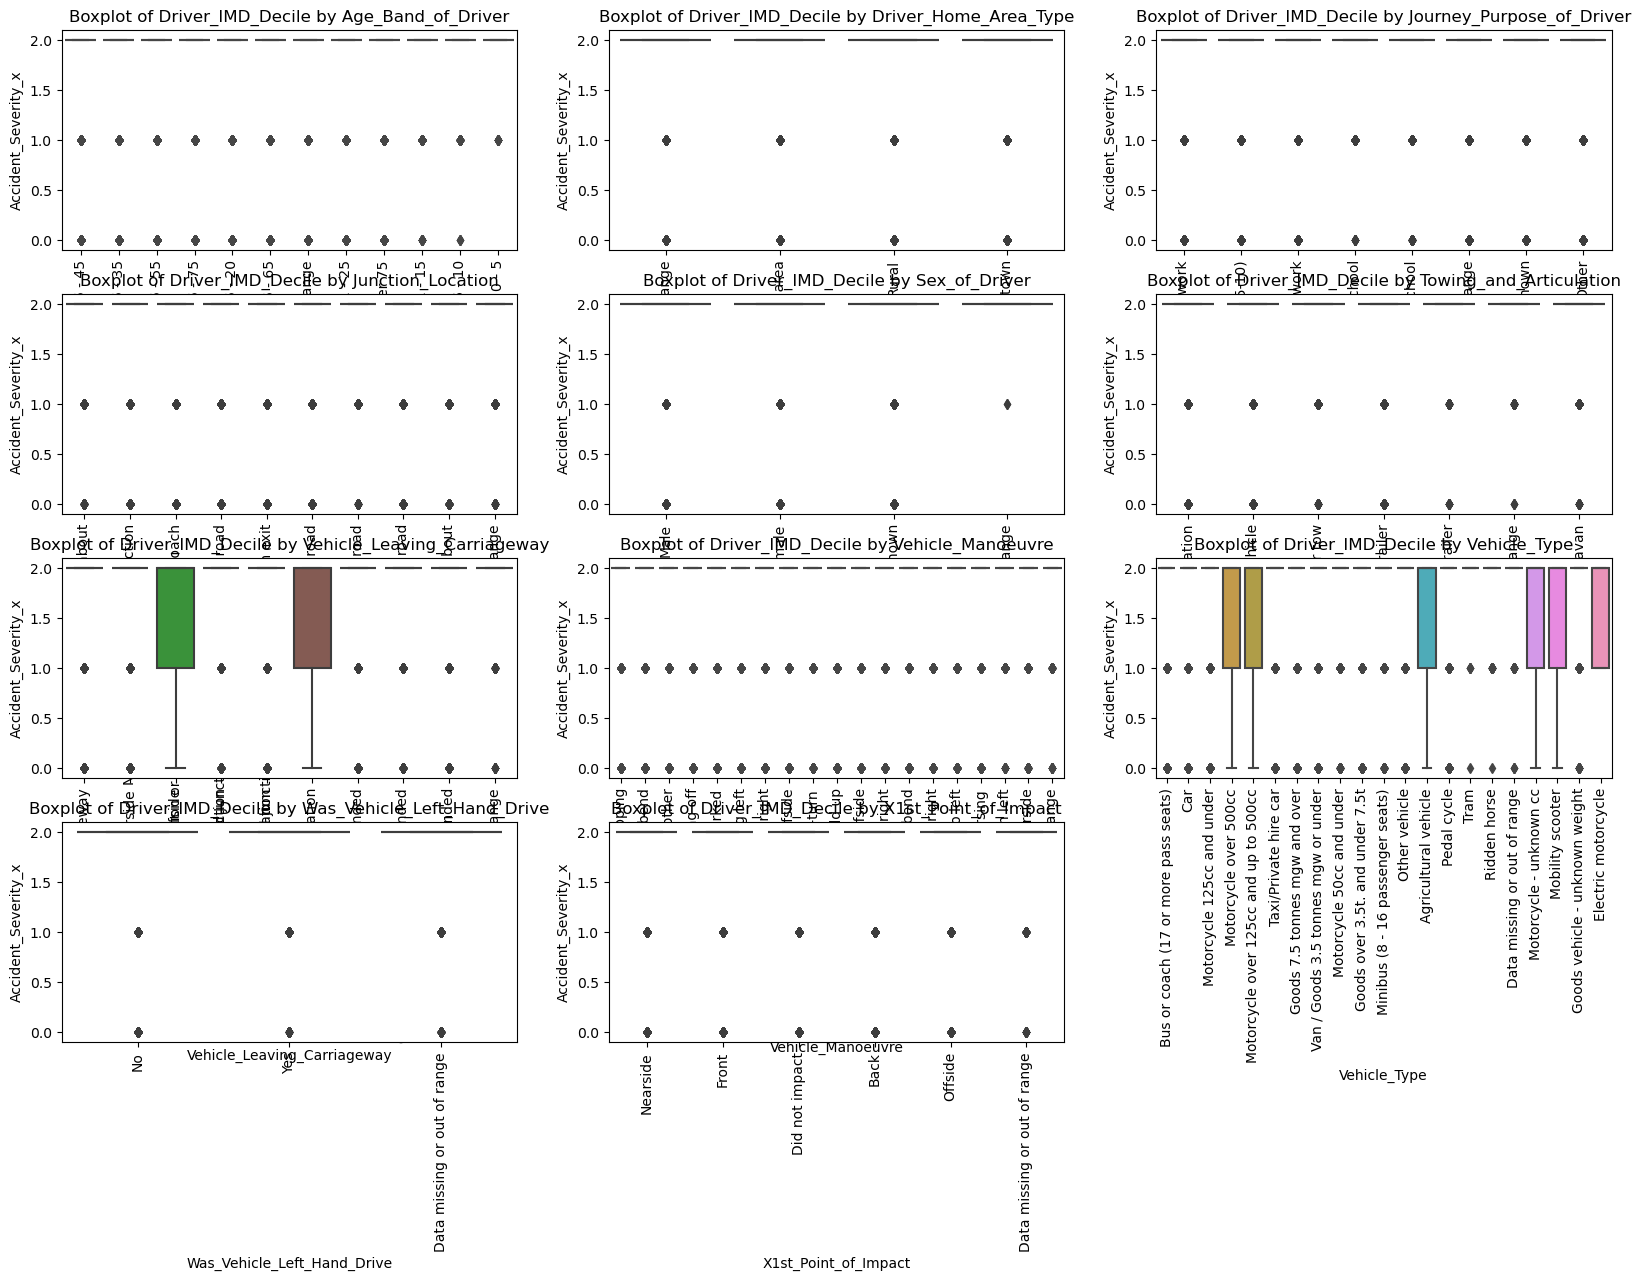

In [9]:
# Pairplot for selected variables
selected_columns = ['Year_x', 'Number_of_Casualties', 'Number_of_Vehicles']
sns.pairplot(train_raw[selected_columns])
# plt.suptitle('Pairplot of Selected Variables')
# plt.show()

# Heatmap of a subset of variables
subset_columns = ['Year_x', 'Number_of_Casualties','Accident_Severity_x']
plt.figure(figsize=(12, 10))
sns.heatmap(train_raw[subset_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Selected Variables')
plt.show()

# Boxplots for categorical variables with respect to Driver_IMD_Decile
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_columns):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(x=train_raw[col], y=train_raw['Accident_Severity_x'])
    plt.title(f'Boxplot of Driver_IMD_Decile by {col}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


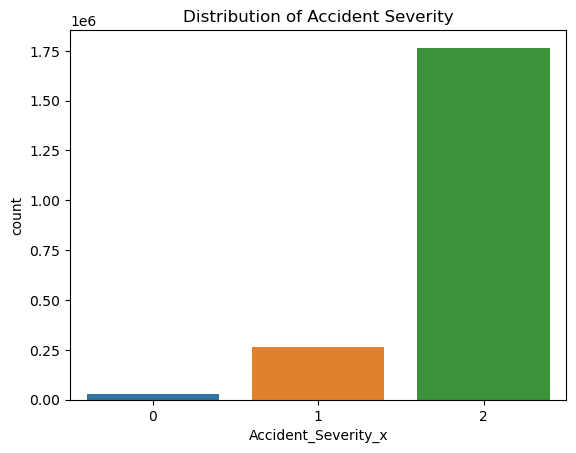

In [10]:
# Plotting the distribution of Accident_Severity
sns.countplot(x= train_raw['Accident_Severity_x'])
plt.title('Distribution of Accident Severity')
plt.show()


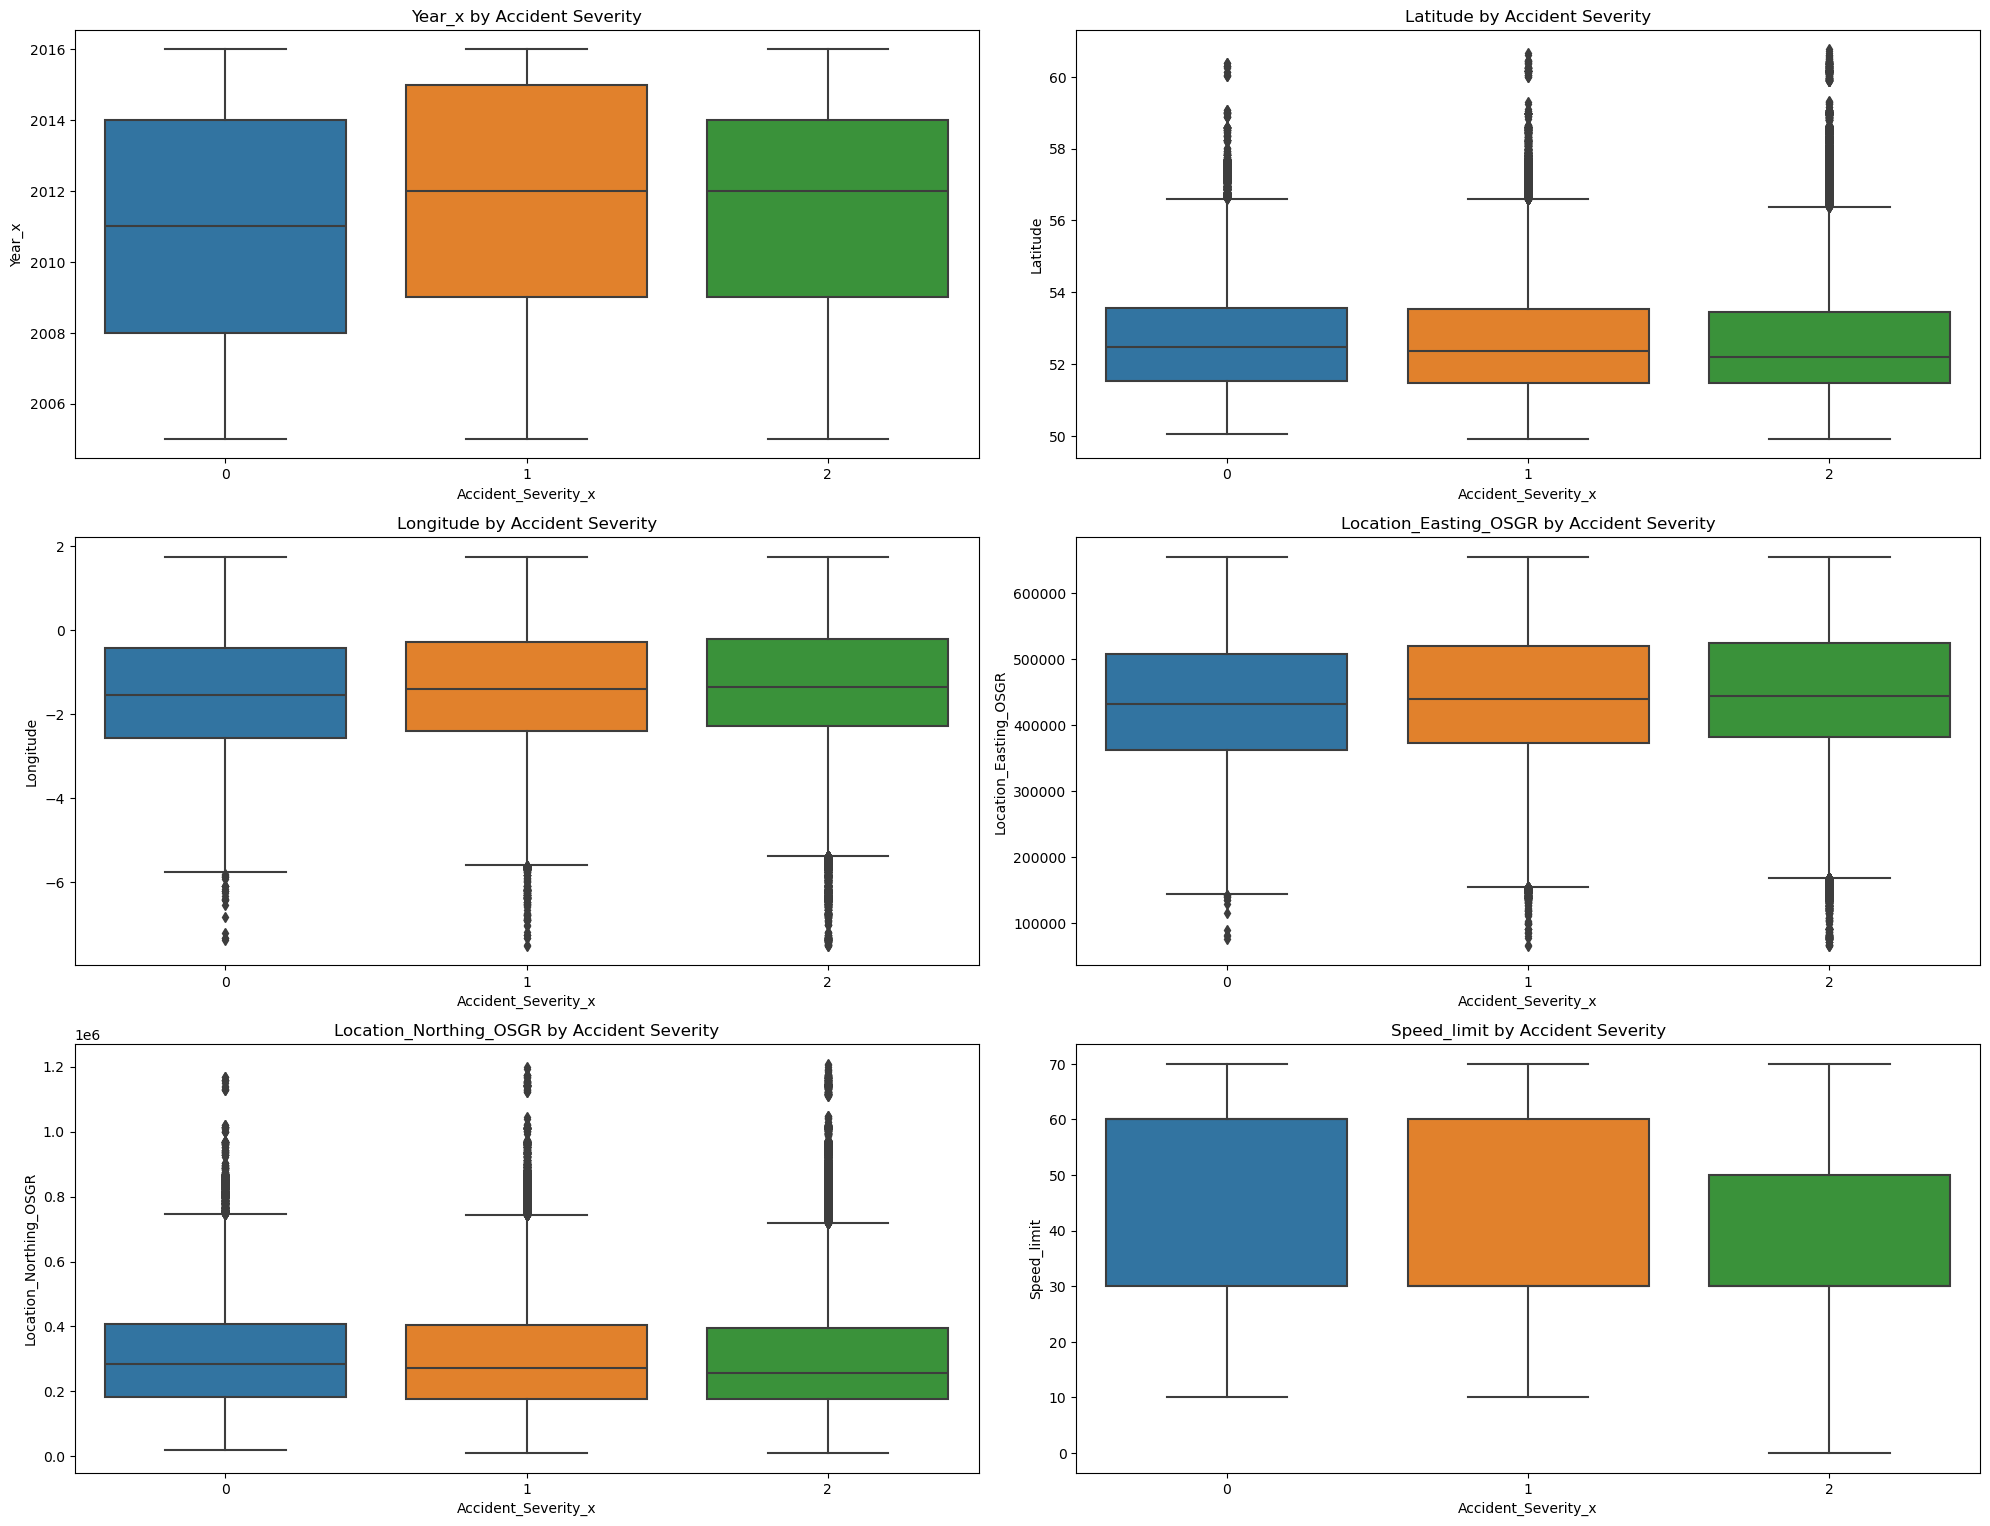

In [11]:
# Plotting boxplots for numerical variables against Accident_Severity
numerical_columns = [ 'Year_x','Latitude', 'Longitude', 
                     'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Speed_limit']

plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=train_raw['Accident_Severity_x'], y=train_raw[col])
    plt.title(f'{col} by Accident Severity')
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
import folium

# Sample data (replace this with your actual dataset)
# train_raw = pd.read_csv('path/to/train_raw.csv')

# Filter data for Scotland if necessary (assuming 'InScotland_x' indicates whether the accident happened in Scotland)
scotland_accidents = train_raw[train_raw['InScotland_x'] == 1]

# Ensure the DataFrame contains 'Latitude' and 'Longitude' columns
latitude = scotland_accidents['Latitude']
longitude = scotland_accidents['Longitude']


In [13]:
import plotly.express as px
%matplotlib inline

In [14]:
# px.scatter_mapbox(train_raw,
#                   lat='Latitude',
#                   lon='Longitude',
#                   color= 'Accident_Index',
#                   color_continuous_scale=px.colors.cyclical.IceFire,
#                   size = 'Accident_Severity_x',
#                   size_max=15,
#                   zoom=9.3,
#                   mapbox_style='open-street-map',
#                   title='Location')
# plt.show()

In [15]:
# # # Correlation heatmap for numerical variables
# # plt.figure(figsize=(16, 12))
# # sns.heatmap(train_raw.corr(), annot=True, fmt=".2f")
# # plt.title('Correlation Matrix')
# # plt.show()

# # Pairplot for selected numerical variables
# selected_columns = ['Year_x', 'Latitude', 'Longitude', 
#                     'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Speed_limit', 'Accident_Severity_x']
# sns.pairplot(train_raw[selected_columns], hue='Accident_Severity_x')
# plt.suptitle('Pairplot of Selected Variables')
# plt.show()


Feature selection